In [5]:
import random
import datetime
import numpy as np
import pandas as pd
from random import randrange
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('talk')

params = {'legend.fontsize' : 'small',
          'figure.figsize' : (10,5),
          'axes.labelsize' : 'medium',
          'axes.titlesize' : 'medium',
          'xtick.labelsize' : 'medium',
          'ytick.labelsize' : 'medium'}

plt.rcParams.update(params)
from IPython.display import display, HTML


def _random_date(start,date_count):
    current = start
    while date_count > 0:
        curr = current + datetime.timedelta(days = randrange(42))
        #return curr
        yield curr
        date_count -= 1

def generate_sample_data(row_count=100):
    #sentinels
    startDate = datetime.datetime(2016, 1, 1,13)
    serial_number_sentinel = 1000
    User_id_sentinel = 5001
    product_id_sentinel = 101
    price_sentinel = 2000

    # base list attributes
    data_dict = {
        'Serial No' : np.arange(row_count) + serial_number_sentinel,
        'Date': np.random.permutation(pd.to_datetime([x.strftime("%d-%m-%y")
                for x in _random_date(startDate,row_count)]).date),
        'User ID' : np.random.permutation(np.random.randint(0,row_count,size = int(row_count/10)) + product_id_sentinel).tolist()*10,
        'Product ID' : np.random.permutation(np.random.randint(0,row_count,size = int(row_count/10)) + product_id_sentinel).tolist()*10,
        'Quantity Purchased': np.random.permutation(np.random.randint(1,42,size=row_count)),
        'Price' : np.round(np.abs(np.random.randn(row_count) + 1) * price_sentinel),
        'User Type' : np.random.permutation([chr(random.randrange(97,97 + 3 + 1))
            for i in range(row_count)])
        }
    #indroduce missing variables
    for index in range(int(np.sqrt(row_count))):
        data_dict['Price'][np.argmax(data_dict['Price'] == random.choice(data_dict['Price']))] = np.nan
        data_dict['User Type'][np.argmax(data_dict['User Type'] == random.choice(data_dict['User Type']))] = np.nan
        data_dict['Date'][np.argmax(data_dict['Date'] == random.choice(data_dict['Date']))] = np.nan
        data_dict['Product ID'][np.argmax(data_dict['Product ID'] == random.choice(data_dict['Product ID']))] = 0
        data_dict['Serial No'][np.argmax(data_dict['Serial No'] == random.choice(data_dict['Serial No']))] = -1
        data_dict['User ID'][np.argmax(data_dict['User ID'] == random.choice(data_dict['User ID']))] = -101

    df = pd.DataFrame(data_dict)
    return df

def cleanup_column_names(df,rename_dict={},do_inplace=True):

    if not rename_dict:
        return df.rename(columns={col: col.lower().replace(' ','_') 
                    for col in df.columns.values.tolist()}, 
                  inplace=do_inplace)
    else:
        return df.rename(column = rename_dict,inplace = do_inplace)

def expand_user_type(u_type):
    if u_type in ['a','b']:
        return 'new'
    elif u_type == 'c':
        return 'existing'
    elif u_type == 'd':
        return 'loyal_existing'
    else:
        return 'error'


df = generate_sample_data(row_count = 1000)
cleanup_column_names(df)

df['date'] = pd.to_datetime(df.date)

df['user_class'] = df['user_type'].map(expand_user_type)

df['purchase_week'] = df[['date']].applymap(lambda dt:dt.week 
    if not pd.isnull(dt.week)
    else 0)

df = df.dropna(subset=['date'])
df['price'].fillna(value=np.round(df.price.mean(),decimals=2),inplace=True)

print(df.head())

    serial_no       date  user_id  product_id  quantity_purchased    price  \
1        1001 2016-01-02      136         193                  18   702.00   
3        1003 2016-02-01      884         305                  32  2508.00   
8        1008 2016-01-01      697         984                  23  3575.00   
9        1009 2016-11-02      487         197                  13   109.00   
10       1010 2016-01-02      847         520                  18  2233.86   

   user_type user_class  purchase_week  
1          n      error             53  
3          n      error              5  
8          n      error             53  
9          n      error             44  
10         n      error             53  


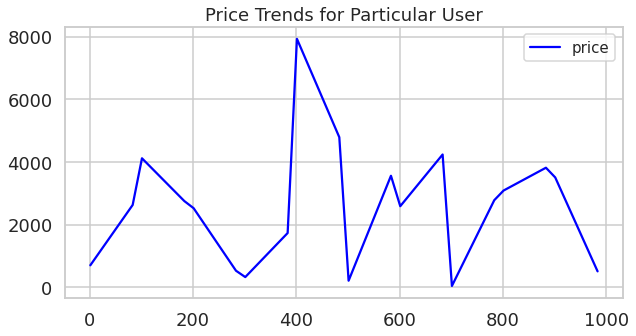

In [6]:
max_user_id = df.user_id.value_counts().index[0]
df[df.user_id == max_user_id][['price']].plot(style='blue')
plt.title('Price Trends for Particular User')
plt.show()


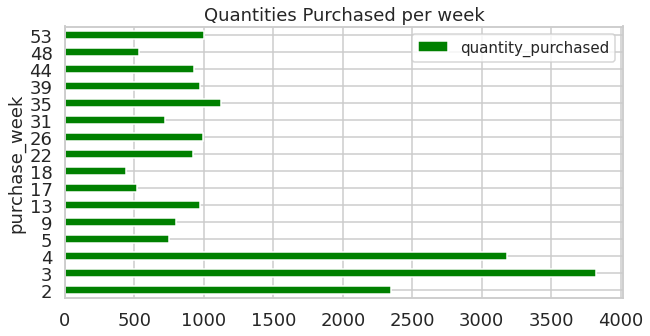

In [7]:
df[['purchase_week','quantity_purchased']].groupby('purchase_week').sum().plot.barh(color="green")
plt.title("Quantities Purchased per week")
plt.show()

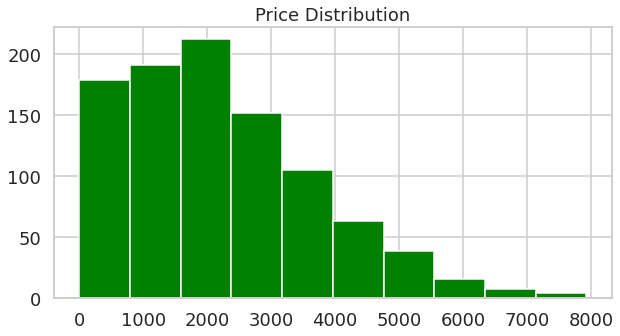

In [8]:
df.price.hist(color='red')
plt.title('Price Distribution')
plt.show()

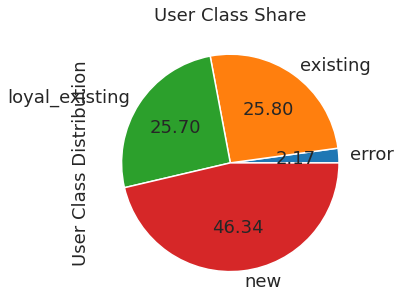

In [9]:
class_series = df.groupby('user_class').size()
class_series.name = 'User Class Distribution'
class_series.plot.pie(autopct='%.2f')
plt.title('User Class Share')
plt.show()


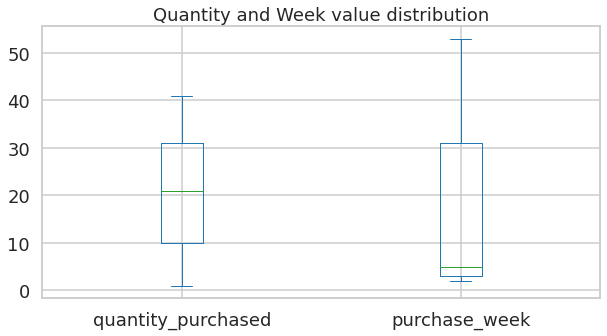

In [10]:
df[['quantity_purchased','purchase_week']].plot.box()
plt.title('Quantity and Week value distribution')
plt.show()